# Optimisez la gestion des données d'une boutique avec R ou Python

### Chargement des librairies

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from mpl_toolkits import mplot3d 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore') 
from functools import reduce


### Chargement des CSV

In [2]:
web= pd.read_csv('web.csv')
liaison = pd.read_csv('liaison.csv')
erp= pd.read_csv('erp.csv')

## I) Traitement des données 

#### A) Donnée Web

Prévisualisation DataFrame web

In [3]:
web.head(15)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
5,19815,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
6,15303,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:13:35,...,pierre-jean-villa-saint-joseph-saut-ange-2018,2019-11-02 13:25:07,2019-11-02 12:25:07,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
7,14975,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:45:14,...,pierre-gaillard-condrieu-2018,2020-08-14 18:15:02,2020-08-14 16:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
8,16042,0,0,0,0.0,7.0,taxable,NaN,2.0,2018-02-12 09:54:27,...,pierre-gaillard-cornas-2017,2020-08-14 10:15:02,2020-08-14 08:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
9,14980,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-12 10:03:05,...,pierre-gaillard-cote-rotie-esprit-blond-2017,2020-08-24 14:00:03,2020-08-24 12:00:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Voyons combien avons nous de produit en observant les données "sku" (clé primaire)

In [4]:
web.sku.nunique()

714

Voyons les dimensions du DataFrame

In [5]:
web.shape

(1513, 28)

Trop de données voyons les doublons 'sku'(la clé primaire)

In [6]:
doublon = web.pivot_table(index = ['sku'], aggfunc ='size') 
  
print(doublon) 

sku
10014                  2
10459                  2
10775                  2
10814                  2
11049                  2
                      ..
8463                   2
9562                   2
9636                   2
9937                   2
bon-cadeau-25-euros    2
Length: 714, dtype: int64


Trouvons comment selectionner les doublons à extraire , regardons les informations de la table

In [7]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

doublons sur tax_status ou post_mime_type? le nombre de valeur non null semble correspondre (faisons un essai ) 

In [8]:
resultat = web.tax_status.value_counts()
print(resultat)

taxable    716
Name: tax_status, dtype: int64


In [9]:
resultat = web.post_mime_type.value_counts()
print(resultat)

image/jpeg    714
Name: post_mime_type, dtype: int64


In [10]:
web.post_mime_type.unique()

array([nan, 'image/jpeg'], dtype=object)

post_mime_type indique qu'il y a une image associé au produit et son nombre d'occurrence correspond au nombre de clé primaire 

In [11]:
webtest = web[web['post_mime_type'].notna()]

In [12]:
webtest

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


Selection du DataFrame des données mis de coté

In [86]:
webna=web[web['post_mime_type'].isnull()] # Conservation des données écartées

In [14]:
webna

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [15]:
webna.shape

(799, 28)

In [16]:
webna.sku.duplicated().sum()

84

In [17]:
dups = webtest.pivot_table(index = ['sku'], aggfunc ='size') 
  
print(dups) 

sku
10014                  1
10459                  1
10775                  1
10814                  1
11049                  1
                      ..
8463                   1
9562                   1
9636                   1
9937                   1
bon-cadeau-25-euros    1
Length: 714, dtype: int64


In [18]:
webtest.duplicated().sum()

0

plus aucune donné en doublons 

Verifions la taille de la table

In [19]:
webtest.shape

(714, 28)

In [20]:
webtest.nunique()

sku                      714
virtual                    1
downloadable               1
rating_count               1
average_rating             1
total_sales               41
tax_status                 0
tax_class                  0
post_author                2
post_date                714
post_date_gmt            714
post_content               0
post_title               711
post_excerpt               0
post_status                1
comment_status             1
ping_status                1
post_password              0
post_name                714
post_modified            587
post_modified_gmt        587
post_content_filtered      0
post_parent                1
guid                     714
menu_order                 1
post_type                  1
post_mime_type             1
comment_count              1
dtype: int64

Si il y a 1 ou 0 comme valeur unique nous pouvons filtrer ces valeurs/ on constate également que sku ne contient que 714 valeur unique

#### B) ERP

In [21]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,"24,2",0,outofstock
1,3849,1,"34,3",0,outofstock
2,3850,1,"20,8",0,outofstock
3,4032,1,"14,1",0,outofstock
4,4039,1,46,0,outofstock


In [22]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      825 non-null    int64 
 1   onsale_web      825 non-null    int64 
 2   price           825 non-null    object
 3   stock_quantity  825 non-null    int64 
 4   stock_status    825 non-null    object
dtypes: int64(3), object(2)
memory usage: 32.4+ KB


La donnée 'price' n'est pas en numérique voyons pourquoi avant de faire la conversion 

In [23]:
erp.price.unique()

array(['24,2', '34,3', '20,8', '14,1', '46', '32,7', '31,2', '60', '42,6',
       '80', '18,3', '22,8', '19,3', '21,8', '7,7', '33,7', '44,3',
       '71,6', '86,1', '12,7', '8,7', '11,9', '14,5', '14,4', '19,5',
       '22', '16,6', '23,4', '33,2', '32', '77,8', '14,7', '14,05',
       '22,9', '44', '37', '39', '17', '23,2', '19', '16,4', '73', '47',
       '13,7', '12,6', '12,8', '22,1', '15,8', '16,3', '9,7', '6,8', '35',
       '31,7', '100', '23', '88,4', '29,8', '25,7', '77,4', '53', '49',
       '29,5', '33', '37,5', '69', '59', '19,2', '29', '9,8', '20,35',
       '12', '18,5', '9,3', '11,6', '14,3', '10,8', '7,6', '20,5', '18,2',
       '9', '7,8', '5,7', '13,5', '11,5', '24', '16,7', '21,4', '13,3',
       '9,5', '12,1', '17,8', '27,2', '9,4', '5,8', '38', '9,9', '11,3',
       '6,7', '73,5', '79,8', '48,5', '39,8', '58,8', '26,5', '13,4',
       '17,1', '8,9', '17,2', '16,9', '29,9', '9,6', '11,1', '20', '28',
       '8,6', '15,3', '14,8', '59,6', '26,9', '24,4', '32,1', '12

Les chiffres sont exprimés avec des virgules au lieu de point 

In [24]:
erp['price'].replace(',','.',inplace=True,regex = True)

Conversion en numérique 

In [25]:
erp["price"] = pd.to_numeric(erp["price"])

Pour rapprocher les tables conservons uniquement les produits vendu sur le net

In [26]:
venteweb=erp[ erp['onsale_web'] == 1 ]

Verifions la cohérence de la donnée 'onsale_web' en comparant avec le DF de liaison 

In [27]:
noventeweb=erp[ erp['onsale_web'] == 0 ] # Produit théoriquement non vendu sur le web 

In [28]:
prodmalref = pd.merge(noventeweb,liaison, on=['product_id'], how='inner') # liaison des deux DF
prodmalref.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,4055,0,86.1,0,outofstock,NaN
1,4090,0,73.0,0,outofstock,NaN
2,4092,0,47.0,0,outofstock,NaN
3,4195,0,14.1,0,outofstock,NaN
4,4209,0,73.5,0,outofstock,NaN


Il y a effectivement des produits non référencés comme vendu sur le web qui apparaissent néanmoins sur la table liaison. Seulement on constate qu'elles n'ont pas de correspondance 'sku'. On peut en déduire qu'elles étaient précédemment vendu sur le web puis retirés en cours d'élaboration de la table liaison ce qui explique sa présence sur la table liaison sans correspondance.

In [29]:
venteweb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      717 non-null    int64  
 1   onsale_web      717 non-null    int64  
 2   price           717 non-null    float64
 3   stock_quantity  717 non-null    int64  
 4   stock_status    717 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 33.6+ KB


product_id=clé ; plus que dans web (3 données en trop), nous les extrairons pour les conserver lors de la fusion des DF

#### C) Liaison

In [30]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [31]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


Toutes les correspondances ne sont pas rempli

Faisons les jointures en jointure interne pour ne conserver que les correspondances/renommer id_web en sku/ faire une liste des product_id n'ayant pas de correspondance

In [32]:
prodnocor=liaison[liaison['id_web'].isnull() ] # mise de côté des références sans correspondance

Conservons les données sans correspondances

In [33]:
prodnocor

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


Renommons la colonne 'id_web' pour jointure 

In [34]:
liaison.rename(columns={'id_web': 'sku'}, inplace=True)

## II) Fusion des dataframes (jointure-merge() )

### A) Jointure web/liaison

In [35]:
tabweb = webtest.merge(liaison, on='sku', how='inner')

In [36]:
tabweb

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,product_id
0,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,3847
1,15296,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,3849
2,15300,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,3850
3,19814,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-09 14:01:05,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,4032
4,19815,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-12 09:04:37,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,4039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,6930
710,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,7023
711,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,7025
712,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,7247


### B) Jointure ERP (vente web)

In [37]:
tabdef = tabweb.merge(venteweb, on='product_id', how='outer') # en 'outer' pour récupérer les données sans correspondance

In [38]:
tabdef

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
0,15298,0.0,0.0,0.0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,3847,1,24.2,0,outofstock
1,15296,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,...,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,3849,1,34.3,0,outofstock
2,15300,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,...,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,3850,1,20.8,0,outofstock
3,19814,0.0,0.0,0.0,0.0,3.0,NaN,NaN,2.0,2018-02-09 14:01:05,...,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,4032,1,14.1,0,outofstock
4,19815,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,2018-02-12 09:04:37,...,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,4039,1,46.0,0,outofstock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,13127-1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,7247,1,54.8,23,instock
713,16230,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,2020-07-20 11:00:00,...,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,7338,1,16.3,45,instock
714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4594,1,144.0,0,outofstock
715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5070,1,84.7,0,outofstock


Retrouvons les trois produits référencés comme vendu sur le web mais non présent sur le DF web

In [39]:
nonref=tabdef[tabdef['sku'].isnull() ]

In [40]:
nonref

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4594,1,144.0,0,outofstock
715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5070,1,84.7,0,outofstock
716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5075,1,43.3,0,outofstock


Maintenant filtrons les du DF

In [41]:
tabdef = tabdef[tabdef['sku'].notna()] #pour conservation 

## III) Observation du DataFrame 

In [42]:
tabdef.nunique()

sku                      714
virtual                    1
downloadable               1
rating_count               1
average_rating             1
total_sales               41
tax_status                 0
tax_class                  0
post_author                2
post_date                714
post_date_gmt            714
post_content               0
post_title               711
post_excerpt               0
post_status                1
comment_status             1
ping_status                1
post_password              0
post_name                714
post_modified            587
post_modified_gmt        587
post_content_filtered      0
post_parent                1
guid                     714
menu_order                 1
post_type                  1
post_mime_type             1
comment_count              1
product_id               714
onsale_web                 1
price                    362
stock_quantity           126
stock_status               2
dtype: int64

### a) Création d'une nouvelle clé primaire 

Créons une nouvelle clé primaire pour éviter les confusions

In [43]:
tabdef['idunique'] = tabdef.index

Créons une nouvelle table de correspondance au cas où il faudrait retrouver les données dans une des tables

In [44]:
liaisondef=tabsimple=tabdef[['sku','product_id','idunique']]

### b) Simplification du DataFrame

A présent simplifions le DF en filtrant les données non pertinentes, qui ne possède qu'une seule et unique donnée ou pas de donnée

In [45]:
tabsimple=tabdef[['idunique','post_title', 'total_sales','post_name','price','stock_quantity','stock_status']]

In [46]:
tabsimple

,idunique,post_title,total_sales,post_name,price,stock_quantity,stock_status
0,0,Pierre Jean Villa Saint-Joseph Préface 2018,6.0,pierre-jean-villa-saint-joseph-preface-2018,24.2,0,outofstock
1,1,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,0.0,pierre-jean-villa-saint-joseph-tilde-2017,34.3,0,outofstock
2,2,Pierre Jean Villa Crozes-Hermitage Accroche Co...,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,20.8,0,outofstock
3,3,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,3.0,pierre-jean-villa-igp-gamine-2018,14.1,0,outofstock
4,4,Pierre Jean Villa Côte Rôtie Carmina 2017,0.0,pierre-jean-villa-cote-rotie-carmina-2017,46.0,0,outofstock
...,...,...,...,...,...,...,...
709,709,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,5.0,mouthes-le-bihan-aime-chai-2015,8.4,83,instock
710,710,Camin Larredya Jurançon Sec La Virada 2018,0.0,camin-larredya-jurancon-sec-la-virada-2018,27.5,15,instock
711,711,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,0.0,jamet-cote-rotie-fructus-voluptas-2018,69.0,2,instock
712,712,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,54.8,23,instock


In [47]:
tabsimple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   idunique        714 non-null    int64  
 1   post_title      714 non-null    object 
 2   total_sales     714 non-null    float64
 3   post_name       714 non-null    object 
 4   price           714 non-null    float64
 5   stock_quantity  714 non-null    int64  
 6   stock_status    714 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 44.6+ KB


#### C) Contrôle de cohérence 

Vérifions que les données sont cohérentes concernant la disponibilité des produits 

In [48]:
stockabs = tabsimple[(tabsimple.stock_status == "instock") & (tabsimple.stock_quantity ==0)]

In [49]:
stockabs

,idunique,post_title,total_sales,post_name,price,stock_quantity,stock_status
410,410,Bon cadeau de 25€,10.0,bon-cadeau-de-25-euros,25.0,0,instock


Cette donnée n'est pas dérangeante un bon est créé à la demande donc disponible (instock) sans avoir besoin d'être stocké physiquement (stock quantity = 0)

In [50]:
stocknonref = tabsimple[(tabsimple.stock_status == "outofstock") & (tabsimple.stock_quantity >0)]

In [51]:
stocknonref

,idunique,post_title,total_sales,post_name,price,stock_quantity,stock_status


## IV) Reponse aux demandes 

### A) Chiffre d'affaire par produit

Créons un tableau de chiffre d'affaire par produits 

In [52]:
tabca=tabsimple[['idunique','post_title', 'total_sales','price']] #Simplification du DF

In [53]:
tabca['CA']=tabca['price']*tabca['total_sales'] #Création de la colonne CA

In [54]:
tabca

,idunique,post_title,total_sales,price,CA
0,0,Pierre Jean Villa Saint-Joseph Préface 2018,6.0,24.2,145.2
1,1,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,0.0,34.3,0.0
2,2,Pierre Jean Villa Crozes-Hermitage Accroche Co...,0.0,20.8,0.0
3,3,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,3.0,14.1,42.3
4,4,Pierre Jean Villa Côte Rôtie Carmina 2017,0.0,46.0,0.0
...,...,...,...,...,...
709,709,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,5.0,8.4,42.0
710,710,Camin Larredya Jurançon Sec La Virada 2018,0.0,27.5,0.0
711,711,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,0.0,69.0,0.0
712,712,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,0.0,54.8,0.0


#### a) Simplification en vue d'une représentation graphique 

Pour une meilleure visibilité graphique conservons uniquement les produits ayant été vendu

In [55]:
fi=tabca[ tabca['CA'] > 0 ]

Classons les par ordre décroissant pour voir en priorité les produits les plus rentable 

In [56]:
fi=fi.sort_values(by=['CA'],ascending=False)

#### b) Représentation graphique 

Graphique du chiffre d'affaire par produit

[Text(0.5, 0, 'Chiffre d affaire'),
 Text(0, 0.5, 'Produit'),
 Text(0.5, 1.0, 'Chiffre d affaire de chaque produit')]

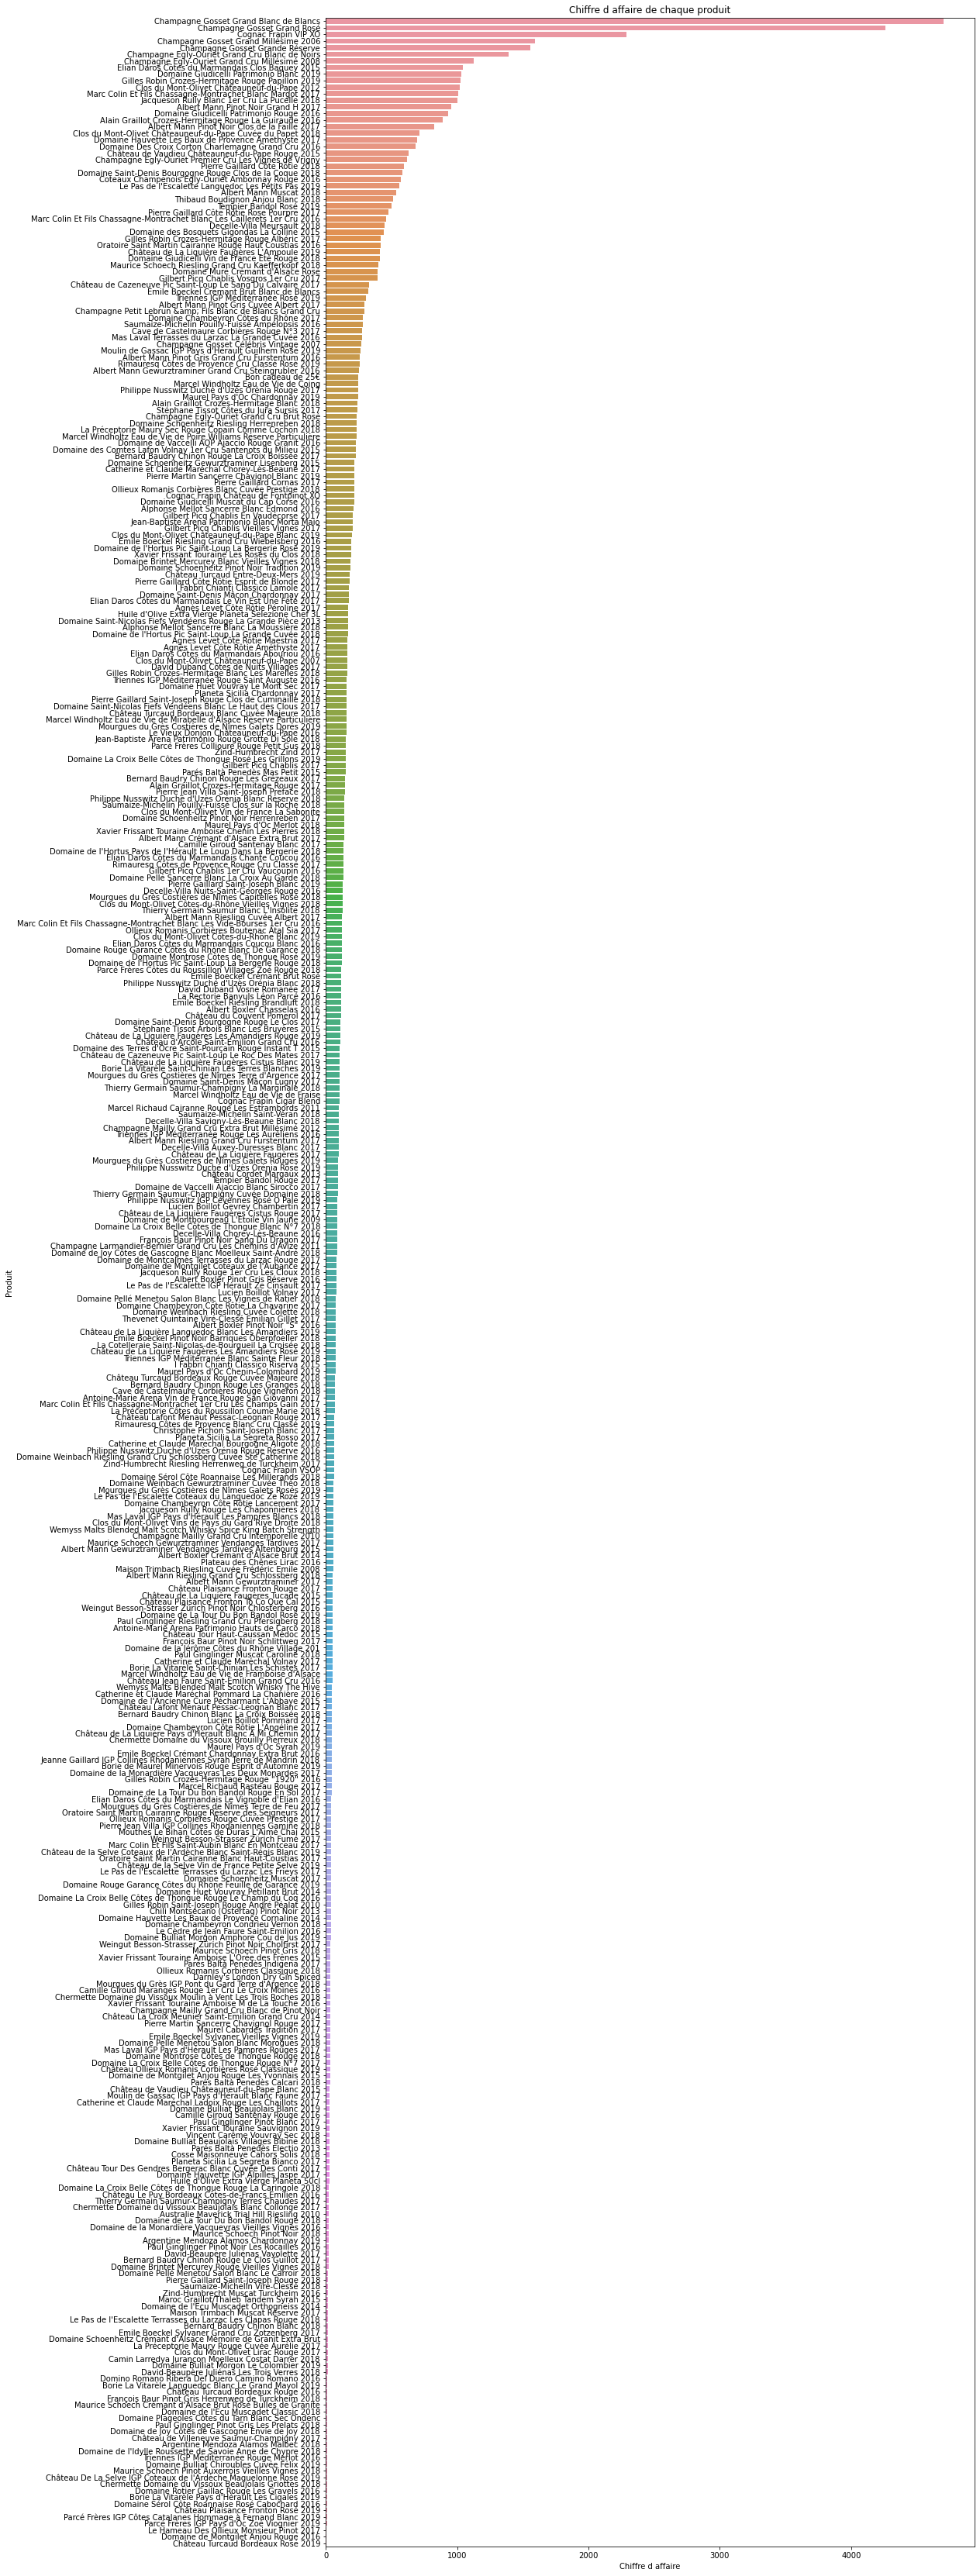

In [90]:
plt.figure(figsize=(15,60))
ax=sns.barplot(x='CA', y='post_title', data=fi)
ax.set(xlabel='Chiffre d affaire', ylabel='Produit',title='Chiffre d affaire de chaque produit')

#### C) Calcul du chiffre d'affaire

Calcul du chiffre d'affaire total 

In [58]:
CAtotal=sum(fi['CA'])

In [59]:
venteglobal=sum(fi['total_sales'])

In [60]:
print('Le chiffre d affaire total des ventes sur le web est de ', round(CAtotal,2),'euros pour un total de',int(venteglobal),'ventes')

Le chiffre d affaire total des ventes sur le web est de  70568.6 euros pour un total de 2865 ventes


In [61]:
prixmax=fi.sort_values(by=['price'],ascending=False)

#### D) Segmentation

In [62]:
indtop=round((len(fi)*10)/100)

In [63]:
indmed=round((len(fi)*30)/100)

In [64]:
indbot=len(fi)

Les 10% des produits ayant fait les plus gros chiffres d'affaires 

In [65]:
tabtop=fi[0:indtop]

In [66]:
CAtop=sum(tabtop['CA'])
ventetop=sum(tabtop['total_sales'])

In [67]:
print('Les 10% des meilleurs ventes représentent un chiffre d affaire de',round(CAtop,2),'euros soit',round((CAtop/CAtotal)*100,2),'% du chiffre d affaire total pour un total de',ventetop,'ventes soit',round((ventetop/venteglobal)*100,2),'% des ventes totales')

Les 10% des meilleurs ventes représentent un chiffre d affaire de 37771.9 euros soit 53.53 % du chiffre d affaire total pour un total de 964.0 ventes soit 33.65 % des ventes totales


In [68]:
tabmid=fi[indtop:indmed]

Les 30% suivants

In [69]:
CAmid=sum(tabmid['CA'])
ventemid=sum(tabmid['total_sales'])

In [70]:
print('Les 30% des ventes suivantes représentent un chiffre d affaire de',round(CAmid,2),'euros soit',round((CAmid/CAtotal)*100,2),'% du chiffre d affaire total pour un total de',int(ventemid),'ventes soit',round((ventemid/venteglobal)*100,2),'% des ventes totales')

Les 30% des ventes suivantes représentent un chiffre d affaire de 16637.7 euros soit 23.58 % du chiffre d affaire total pour un total de 883 ventes soit 30.82 % des ventes totales


Les 60% restant

In [71]:
tabbot=fi[indmed:indbot]

In [72]:
CAbot=sum(tabbot['CA'])
ventebot=sum(tabbot['total_sales'])

In [73]:
print('Le reste des ventes représentent un chiffre d affaire de',round(CAbot,2),'euros soit',round((CAbot/CAtotal)*100,2),'% du chiffre d affaire total pour un total de ',int(ventebot),'ventes soit',round((ventebot/venteglobal)*100,2),'% des ventes totales')

Le reste des ventes représentent un chiffre d affaire de 16159.0 euros soit 22.9 % du chiffre d affaire total pour un total de  1018 ventes soit 35.53 % des ventes totales


Faisons la même chose mais avec la variable 'prix'

Les 10% des produits ayant les prix les plus élevés

In [99]:
tabtopprix=prixmax[0:indtop]

Les 30% suivants

In [101]:
tabmidprix=prixmax[indtop:indmed]

Les 60% restants

In [102]:
tabbotprix=prixmax[indmed:indbot]

#### E) Représentations graphiques 

(Text(0.5, 0, 'Prix du produit '),
 Text(0, 0.5, "Chiffre d'affaire "),
 Text(0.5, 1.0, "Chiffre d'affaires en fonction du prix"))

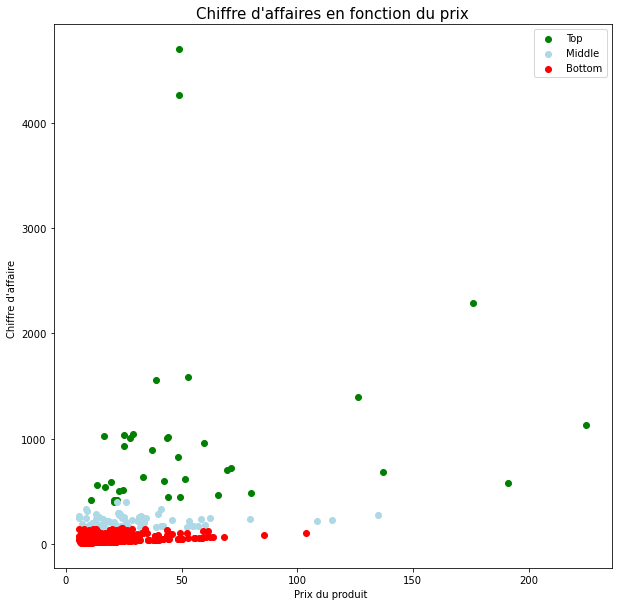

In [74]:
plt.figure(figsize=(10,10))
x =tabtop['price']
y = tabtop['CA']

plt.scatter(x, y, c='green',label='Top')

x =tabmid['price']
y = tabmid['CA']

plt.scatter(x, y, c='lightblue',label='Middle')

x =tabbot['price']
y = tabbot['CA']

plt.scatter(x, y, c='red',label='Bottom')
plt.legend()

plt.xlabel("Prix du produit "),plt.ylabel("Chiffre d'affaire "),plt.title("Chiffre d'affaires en fonction du prix",fontsize=15)

Représentation d'un nuage de points en 3D pour y ajouter la variable nombre de vente 

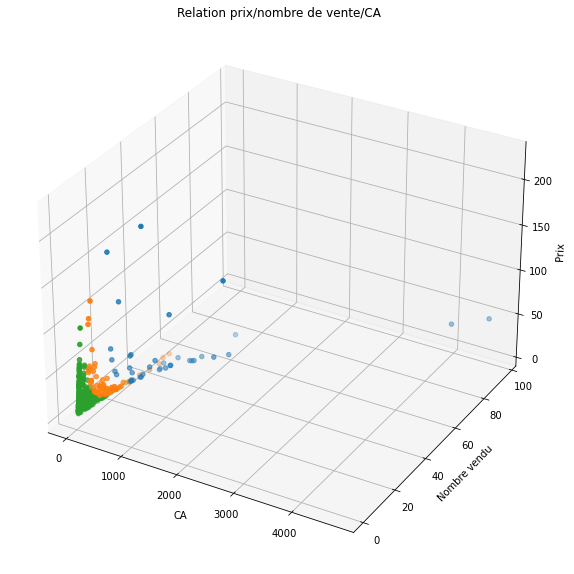

In [75]:
plt.figure(figsize=(10,10))
  
ax = plt.axes(projection ='3d') 
  
z = tabtop['price']
x = tabtop['CA'] 
y = tabtop['total_sales']

ax.scatter(x, y, z,) 

z = tabmid['price'] 
x = tabmid['CA']
y = tabmid['total_sales']

ax.scatter(x, y, z,) 

z =  tabbot['price']
x = tabbot['CA']
y = tabbot['total_sales']

ax.scatter(x, y, z,) 
  
ax.set_title('Relation prix/nombre de vente/CA')
ax.set_xlabel('CA')
ax.set_ylabel('Nombre vendu')
ax.set_zlabel('Prix ')
plt.show() 

In [76]:
fi.price.describe()


count    385.000000
mean      26.581429
std       24.934530
min        5.700000
25%       12.500000
50%       19.000000
75%       31.700000
max      225.000000
Name: price, dtype: float64

In [77]:
syn = [['top', tabtop['CA'].sum()], ['middle', tabmid['CA'].sum()], ['bottom', tabbot['CA'].sum()]] 
  
syn = pd.DataFrame(syn, columns = ['Categorie', 'Chiffre']) 
  

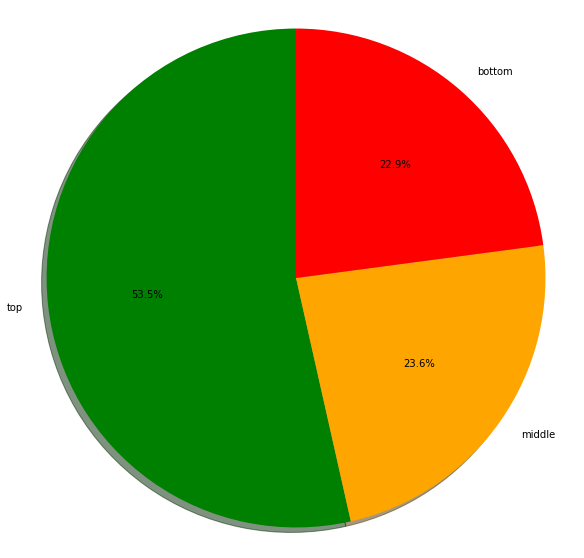

In [78]:
 plt.figure(figsize=(10,10))
labels = syn['Categorie']
ca = syn['Chiffre']
colors = ['green', 'orange', 'red']

plt.pie(ca, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

### B) Recherche des données aberrantes dans les prix

#### a) Représentation graphique 

<AxesSubplot:xlabel='price'>

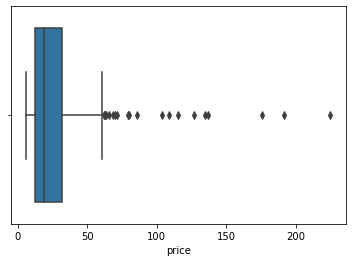

In [91]:
sns.boxplot(fi['price']) #Boite à moustache pour visualiser les outliers

Outliers uniquement présent dans la partie supérieure des prix (au alentours de >60 )

#### b) Recherche par quantile

In [80]:
limsup=fi['price'].quantile(.95)
out=fi[fi['price']>limsup]
out

,idunique,post_title,total_sales,price,CA
218,218,Cognac Frapin VIP XO,13.0,176.0,2288.0
201,201,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,11.0,126.5,1391.5
199,199,Champagne Egly-Ouriet Grand Cru Millésimé 2008,5.0,225.0,1125.0
18,18,Clos du Mont-Olivet Châteauneuf-du-Pape Cuvée ...,10.0,71.6,716.0
182,182,Domaine Hauvette Les Baux de Provence Amethyst...,10.0,69.8,698.0
381,381,Domaine Des Croix Corton Charlemagne Grand Cru...,5.0,137.0,685.0
587,587,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,3.0,191.3,573.9
10,10,Pierre Gaillard Côte Rôtie Rose Pourpre 2017,6.0,80.0,480.0
491,491,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,7.0,65.9,461.3
642,642,Champagne Gosset Célébris Vintage 2007,2.0,135.0,270.0


#### c) Recherche par le Z-score

In [92]:
dfz=fi[ ((fi['price'] - fi['price'].mean())/fi['price'].std())> 2 ] #Originellement >3 mais modifié

In [82]:
dfz

,idunique,post_title,total_sales,price,CA
218,218,Cognac Frapin VIP XO,13.0,176.0,2288.0
201,201,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,11.0,126.5,1391.5
199,199,Champagne Egly-Ouriet Grand Cru Millésimé 2008,5.0,225.0,1125.0
381,381,Domaine Des Croix Corton Charlemagne Grand Cru...,5.0,137.0,685.0
587,587,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,3.0,191.3,573.9
10,10,Pierre Gaillard Côte Rôtie Rose Pourpre 2017,6.0,80.0,480.0
642,642,Champagne Gosset Célébris Vintage 2007,2.0,135.0,270.0
200,200,Champagne Egly-Ouriet Grand Cru Brut Rosé,3.0,79.5,238.5
653,653,Domaine des Comtes Lafon Volnay 1er Cru Santen...,2.0,115.0,230.0
219,219,Cognac Frapin Château de Fontpinot XO,2.0,108.5,217.0


Au vue de la nature des produits, les données ne sont pas aberrante mais atypique 

#### d) Représentation des outliers dans le top des ventes

In [103]:
commun=df = out.merge(tabtop, how = 'inner' ) # rapprochement des deux DF

In [84]:
rate=(len(commun)*100)/len(out)
caout=commun['CA'].sum()

In [98]:
print('Il y a',rate,'% des outliers présent dans les 10% des produits les plus rentables pour un total de',round(caout,2),'euros de CA                 soit',round((caout/CAtotal)*100,2),"% du CA total")

Il y a 45.0 % des outliers présent dans les 10% des produits les plus rentables pour un total de 8418.7 euros de CA                 soit 11.93 % du CA total


Comparaison des produits les plus chers avec les produits les plus rentables 

In [104]:
correlation= tabtop.merge(tabtopprix, how = 'inner' )

In [105]:
correlation

,idunique,post_title,total_sales,price,CA
0,218,Cognac Frapin VIP XO,13.0,176.0,2288.0
1,70,Champagne Gosset Grand Millésime 2006,30.0,53.0,1590.0
2,201,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,11.0,126.5,1391.5
3,199,Champagne Egly-Ouriet Grand Cru Millésimé 2008,5.0,225.0,1125.0
4,445,Albert Mann Pinot Noir Grand H 2017,16.0,59.9,958.4
5,18,Clos du Mont-Olivet Châteauneuf-du-Pape Cuvée ...,10.0,71.6,716.0
6,182,Domaine Hauvette Les Baux de Provence Amethyst...,10.0,69.8,698.0
7,381,Domaine Des Croix Corton Charlemagne Grand Cru...,5.0,137.0,685.0
8,587,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,3.0,191.3,573.9
9,10,Pierre Gaillard Côte Rôtie Rose Pourpre 2017,6.0,80.0,480.0


Voici les produits à la fois présent dans les produits les 10% les plus chers et les 10% les plus rentables 

##### Conclusion : On constate que les produits les plus chers font souvent partie des produits les plus rentables. 